In [52]:
from scipy.io import wavfile
import numpy as np

In [53]:
# We'll need numpy for some mathematical operations
import numpy as np

# Librosa for audio
import librosa

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline
# And seaborn to make it look nice
import seaborn
seaborn.set(style='ticks')

# and IPython.display for audio output
import IPython.display

In [350]:
audio_path = './Shortnews.wav'
y_test, sr = librosa.load(audio_path, sr = 44100)

In [ ]:
audio_path = './male.wav'
y_m, sr = librosa.load(audio_path, sr = 44100)

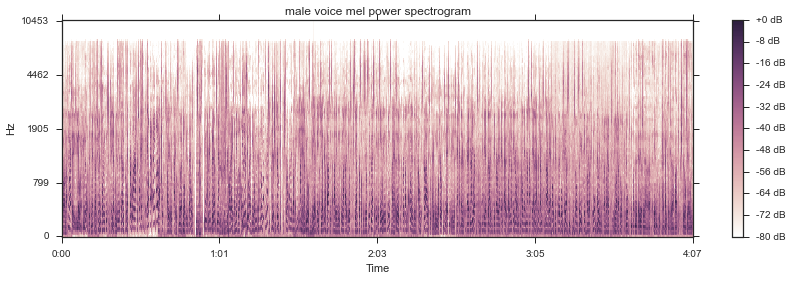

In [61]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_m = librosa.feature.melspectrogram(y_m, sr = sr, n_mels = 128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S_m = librosa.logamplitude(S_m, ref_power = np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S_m, sr = sr, x_axis = 'time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('male voice mel power spectrogram')

# draw a color bar
plt.colorbar(format = '%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

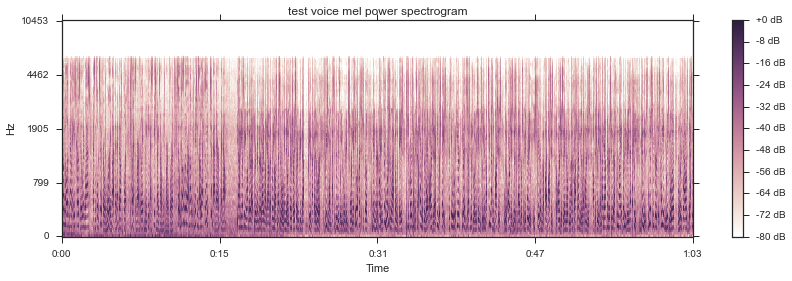

In [352]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_test = librosa.feature.melspectrogram(y_test, sr = sr, n_mels = 128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S_test = librosa.logamplitude(S_test, ref_power = np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S_test, sr = sr, x_axis = 'time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('test voice mel power spectrogram')

# draw a color bar
plt.colorbar(format = '%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [56]:
audio_path = './female.wav'

y_f, sr = librosa.load(audio_path, sr = 44100)

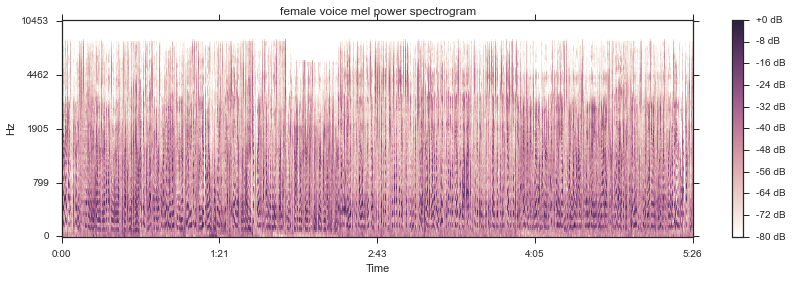

In [62]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_f = librosa.feature.melspectrogram(y_f, sr = sr, n_mels = 128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S_f = librosa.logamplitude(S_f, ref_power = np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S_f, sr = sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('female voice mel power spectrogram')

# draw a color bar
plt.colorbar(format = '%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

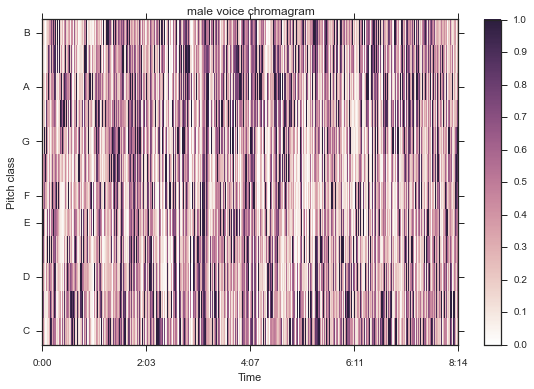

In [58]:
chroma_m = librosa.feature.chroma_stft(y = y_m, sr = sr)
librosa.display.specshow(chroma_m, y_axis = 'chroma', x_axis='time')
plt.colorbar()
plt.title('male voice chromagram')
plt.tight_layout()

In [573]:
chroma_f.shape

(12, 28166)

In [575]:
28166/247

114.03238866396761

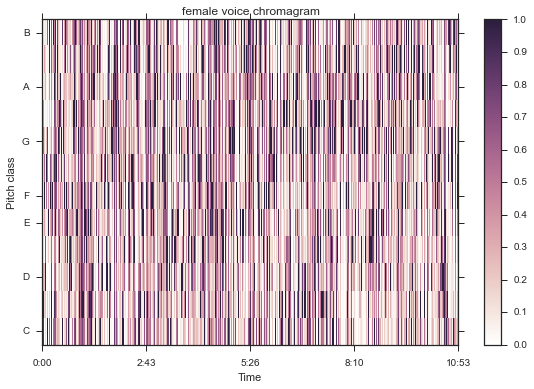

In [60]:
chroma_f = librosa.feature.chroma_stft(y = y_f, sr = sr)
librosa.display.specshow(chroma_f, y_axis = 'chroma', x_axis='time')
plt.colorbar()
plt.title('female voice chromagram')
plt.tight_layout()

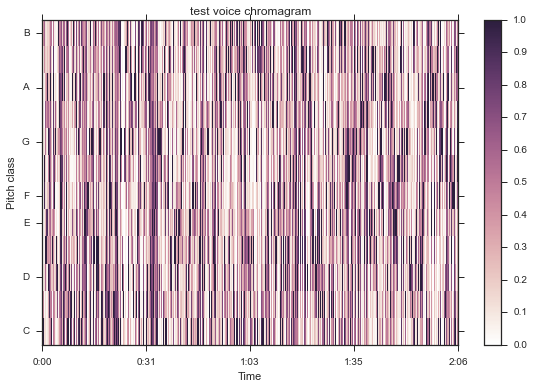

In [577]:
chroma_test = librosa.feature.chroma_stft(y = y_test, sr = sr)
librosa.display.specshow(chroma_test, y_axis = 'chroma', x_axis='time')
plt.colorbar()
plt.title('test voice chromagram')
plt.tight_layout()

In [306]:
power_f = - log_S_f / 80
power_m = - log_S_m / 80

In [353]:
power_test = - log_S_test / 80

In [44]:
power_f.shape

(16, 28166)

In [43]:
import conceptor.util as util
import conceptor.reservoir as reservoir
import conceptor.logic as logic

In [49]:
RNN = reservoir.Reservoir(16, 10)

In [50]:
RNN.drive_reservoir(power_f[:,0:4],0)

array([[ 0.58667578, -0.42765734, -0.8684625 , -0.96378169],
       [ 0.86527808,  0.5497851 ,  0.24468484,  0.55267909],
       [ 0.71801379,  0.97580605,  0.86489716,  0.3124927 ],
       [ 0.9888996 ,  0.98619005,  0.99635315,  0.9963422 ],
       [-0.63560091, -0.82382066, -0.68610599, -0.87032406],
       [-0.80962568, -0.95210474, -0.97979582, -0.95912653],
       [ 0.13658004, -0.13333112, -0.38373983, -0.18779668],
       [-0.97241023, -0.85409695,  0.05044165,  0.93428846],
       [ 0.54409525,  0.45621294,  0.93301306,  0.88603865],
       [ 0.99971838,  0.99984986,  0.99978296,  0.99919107]])

In [ ]:
RNN.x_collectors[1]

In [48]:
power_f[:,0:3]

array([[ 0.56886142,  0.56508526,  0.29994291],
       [ 0.53732951,  0.53485213,  0.28934834],
       [ 0.4923097 ,  0.50870691,  0.30543206],
       [ 0.5596011 ,  0.5353765 ,  0.42769688],
       [ 0.64366371,  0.64603144,  0.52541506],
       [ 0.65579916,  0.66460068,  0.43594855],
       [ 0.66764155,  0.65939643,  0.46013133],
       [ 0.73369022,  0.73059124,  0.6430485 ],
       [ 0.64297564,  0.64332706,  0.57534573],
       [ 0.67519888,  0.69052445,  0.63965221],
       [ 0.60561085,  0.60289469,  0.61803807],
       [ 0.57025799,  0.58304374,  0.62534748],
       [ 0.48960708,  0.51121711,  0.57414173],
       [ 0.51592641,  0.53637258,  0.61997915],
       [ 0.58805229,  0.61695185,  0.70915794],
       [ 0.83111986,  0.87274778,  0.97496503]])

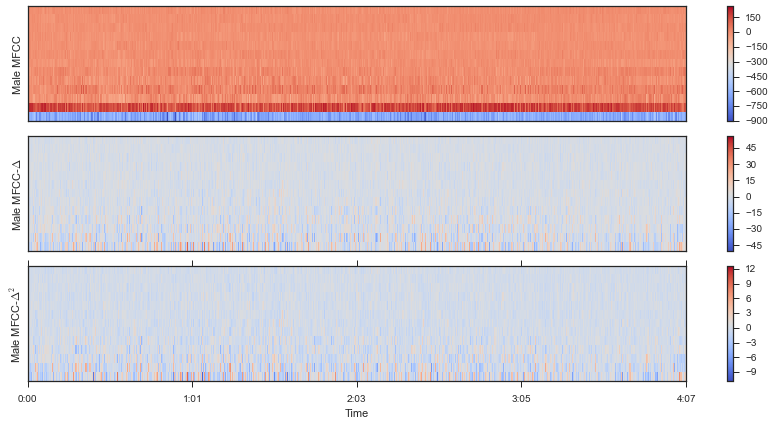

In [63]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc_m = librosa.feature.mfcc(S = log_S_m, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc_m = librosa.feature.delta(mfcc_m)
delta2_mfcc_m = librosa.feature.delta(mfcc_m, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc_m)
plt.ylabel('Male MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc_m)
plt.ylabel('Male MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc_m, sr=sr, x_axis='time')
plt.ylabel('Male MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()


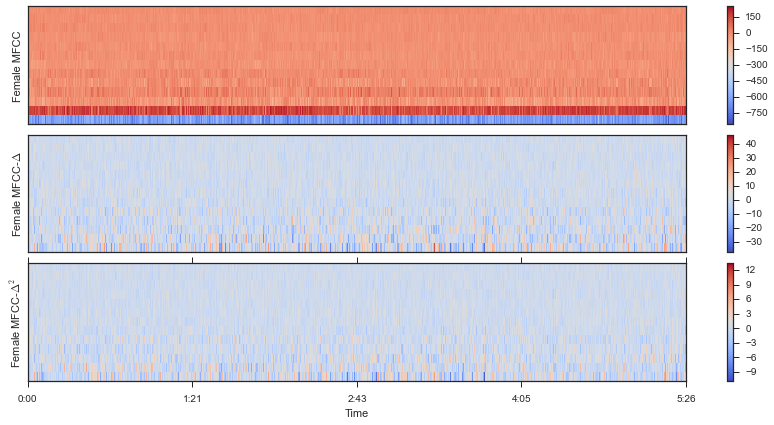

In [64]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc_f = librosa.feature.mfcc(S = log_S_f, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc_f = librosa.feature.delta(mfcc_f)
delta2_mfcc_f = librosa.feature.delta(mfcc_f, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc_f)
plt.ylabel('Female MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc_f)
plt.ylabel('Female MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc_f, sr = sr, x_axis='time')
plt.ylabel('Female MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

In [71]:
# Normalize these mfcc related features
nmfcc_m = (mfcc_m + 1000) / 1500
ndelta_mfcc_m = (delta_mfcc_m + 100) / 200
ndelta2_mfcc_m = (delta2_mfcc_m + 50) / 100

# For future use, we'll stack these together into one matrix
M_m = np.vstack([nmfcc_m, ndelta_mfcc_m, ndelta2_mfcc_m])

In [75]:
# Normalize these mfcc related features
nmfcc_f = (mfcc_f + 1000) / 1500
ndelta_mfcc_f = (delta_mfcc_f + 100) / 200
ndelta2_mfcc_f = (delta2_mfcc_f + 50) / 100

# For future use, we'll stack these together into one matrix
M_f = np.vstack([nmfcc_f, ndelta_mfcc_f, ndelta2_mfcc_f])

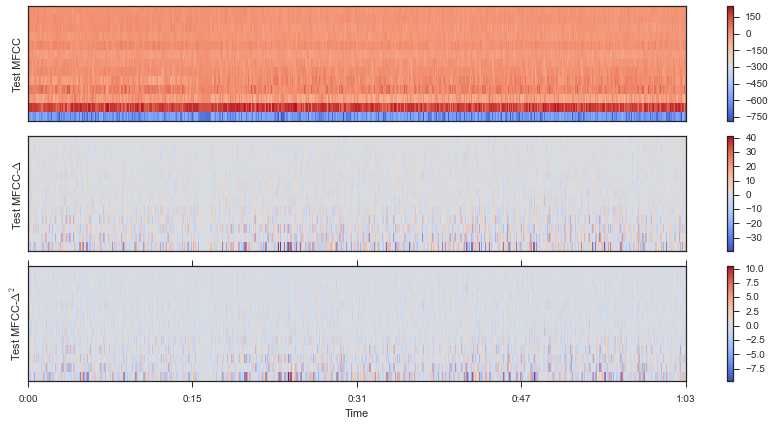

In [540]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc_test = librosa.feature.mfcc(S = log_S_test, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc_test = librosa.feature.delta(mfcc_test)
delta2_mfcc_test = librosa.feature.delta(mfcc_test, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc_test)
plt.ylabel('Test MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc_test)
plt.ylabel('Test MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc_test, sr = sr, x_axis='time')
plt.ylabel('Test MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

In [541]:
# Normalize these mfcc related features
nmfcc_test = (mfcc_test + 1000) / 1500
ndelta_mfcc_test = (delta_mfcc_test + 100) / 200
ndelta2_mfcc_test = (delta2_mfcc_test + 50) / 100

# For future use, we'll stack these together into one matrix
M_test = np.vstack([nmfcc_test, ndelta_mfcc_test, ndelta2_mfcc_test])

In [76]:
print(nmfcc_m.max())
print(ndelta_mfcc_m.max())
print(ndelta2_mfcc_m.max())
print(nmfcc_m.min())
print(ndelta_mfcc_m.min())
print(ndelta2_mfcc_m.min())
print(nmfcc_f.max())
print(ndelta_mfcc_f.max())
print(ndelta2_mfcc_f.max())
print(nmfcc_f.min())
print(ndelta_mfcc_f.min())
print(ndelta2_mfcc_f.min())


0.840882777456
0.779742634641
0.625661116725
0.0645138524248
0.24855918582
0.392310240922
0.830230448209
0.732880307408
0.633913798923
0.0978790526724
0.310893738809
0.391658780102


In [87]:
R_m = (M_m.dot(M_m.T)) / M_m.shape[1]
R_f = (M_f.dot(M_f.T)) / M_f.shape[1]
I = np.eye(R_m.shape[0])

In [117]:
U, Sigma, V = np.linalg.svd(R_f)
R_m

array([[ 0.06285332,  0.19173703,  0.16366476, ...,  0.12373324,
         0.12374008,  0.12372886],
       [ 0.19173703,  0.59946304,  0.51342811, ...,  0.3868017 ,
         0.38679509,  0.38679461],
       [ 0.16366476,  0.51342811,  0.44079317, ...,  0.33178152,
         0.33177892,  0.33178047],
       ..., 
       [ 0.12373324,  0.3868017 ,  0.33178152, ...,  0.25002106,
         0.25000554,  0.25000063],
       [ 0.12374008,  0.38679509,  0.33177892, ...,  0.25000554,
         0.25001585,  0.25000497],
       [ 0.12372886,  0.38679461,  0.33178047, ...,  0.25000063,
         0.25000497,  0.25001751]])

In [119]:
Sigma


array([  1.19944940e+01,   4.02612237e-03,   2.43634181e-03,
         1.55051441e-03,   1.25783189e-03,   6.00062130e-04,
         4.42749672e-04,   3.64338835e-04,   2.87473317e-04,
         2.50776699e-04,   2.07278915e-04,   1.63155905e-04,
         1.55188790e-04,   1.20160957e-04,   1.15325407e-04,
         1.02612804e-04,   9.38071430e-05,   9.07685212e-05,
         7.84333920e-05,   7.25965596e-05,   6.45294531e-05,
         6.27018171e-05,   4.87737949e-05,   3.94277531e-05,
         3.20276376e-05,   2.59046588e-05,   2.27787869e-05,
         1.63386575e-05,   1.49293893e-05,   9.29425033e-06,
         8.67561654e-06,   7.15405615e-06,   6.13910799e-06,
         5.42601140e-06,   4.87295813e-06,   1.43983834e-06,
         8.61422832e-07,   4.29309069e-07,   1.51630501e-07])

In [491]:
def recognition_train(datalist):
    R_list = []
    C_prem_list = []
    apt_list = []
    for data in datalist:
        R = (data.dot(data.T)) / data.shape[1]
        R_list.append(R)
        I = np.eye(R.shape[0])
        C_prem = R.dot(np.linalg.inv(R + I))
        C_prem_list.append(C_prem)

In [492]:
recognition_train(normlist_m)

0.910855779175
1.13091328105
1.91315093187
3.96902606714
6.94433960329
9.67051567385
11.555154451
13.2556169394
15.2126912361


In [321]:
C_pre_m = R_m.dot(np.linalg.inv(R_m + I))
C_pre_f = R_f.dot(np.linalg.inv(R_f + I))

In [486]:
C_m = logic.PHI(C_pre_m, aps)
C_f = logic.PHI(C_pre_f, aps)

In [396]:
C_both = logic.AND(C_m, C_f)

In [397]:
C_onlym = logic.AND(C_m, logic.NOT(C_f))
C_onlyf = logic.AND(C_f, logic.NOT(C_m))

In [389]:
nC_m = logic.NOT(C_m)
nC_f = logic.NOT(C_f)

In [487]:
evidence_m = sum(states_test * (C_m.dot(states_test)))
evidence_f = sum(states_test * (C_f.dot(states_test)))

In [498]:
evidence_temp = sum(states_m * (C_m.dot(states_m)))


In [398]:
evidence1_m = sum(states_test * (C_onlym.dot(states_test)))
evidence1_f = sum(states_test * (C_onlyf.dot(states_test)))

In [501]:
np.mean(evidence_temp)

17.882502323783484

In [548]:
def recognition_predict(testdata, C_list):
    evidence_list = []
    for C in C_list:
        evidence = sum(testdata * (C.dot(testdata)))
        evidence_list.append(evidence)
    evidence = np.row_stack(evidence_list)
    return np.argmax(evidence, axis = 0)

In [564]:
results = recognition_predict(feature_m, C_list)

In [391]:
nevidence_m = sum(states_test * (nC_m.dot(states_test)))
nevidence_f = sum(states_test * (nC_f.dot(states_test)))

In [488]:
evidence = np.vstack([evidence_m[None], evidence_f[None]])

In [399]:
evidence1 = np.vstack([evidence1_m[None], evidence1_f[None]])

In [393]:
nevidence = np.vstack([nevidence_m[None], nevidence_f[None]])

In [489]:
results = np.argmax(evidence, axis = 0)

In [400]:
results = np.argmax(evidence1, axis = 0)

(-1, 2)

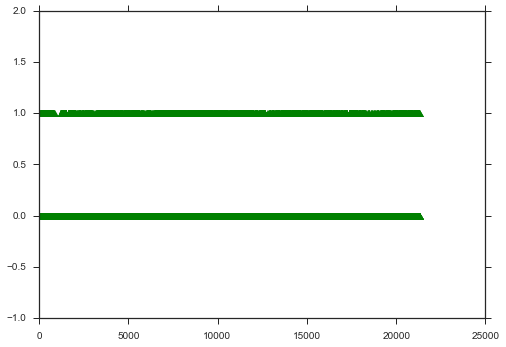

In [565]:
plt.plot(results, 'g^')
axes = plt.gca()
axes.set_ylim([-1,2])

In [572]:
results

array([1, 1, 1, ..., 0, 1, 1])

In [157]:
def consecdata(datavec, timestep = 4):
    resultvec = datavec
    for i in range(timestep):
        resultvec = np.dstack([resultvec, np.hstack([datavec[:, (i + 1):], datavec[:, 0:(i + 1)]])])
    return resultvec

In [309]:
timevec_f = consecdata(power_f, 3)
timevec_m = consecdata(power_m, 3)

In [354]:
timevec_test = consecdata(power_test, 3)

In [167]:
from imp import reload


In [312]:
reload(reservoir)
RNN = reservoir.Reservoir(128, 25, sr = 1.2, in_scale = 0.2, bias_scale = 1)

In [185]:
RNN.

In [207]:
def reservoir_augment(datavec, size_net, size_in,
               size_net,
               sr = 1.5,
               in_scale = 1.5,
               bias_scale = 0.2,):
    W_star, W_in, W_bias = util.init_weights(size_in,
                                                      size_net,
                                                      sr,
                                                      in_scale,
                                                      bias_scale)
    resultvec = np.zeros((datavec.shape[2] * network.size_net, datavec.shape[1]))
    for i in range(datavec.shape[1]):
        network.drive_reservoir(datavec[:, i, :], 0)
        resultvec[:, i] = network.x_collectors[i].flatten(1)
    return resultvec

In [208]:
RNN.clean_storage()

In [313]:
states_f, rawstates_f = RNN.augment(timevec_f)

In [314]:
states_m, rawstates_m = RNN.augment(timevec_m)

In [355]:
states_test, rawstates_test = RNN.augment(timevec_test)

In [315]:
R_m = (states_m.dot(states_m.T)) / states_m.shape[1]
R_f = (states_f.dot(states_f.T)) / states_f.shape[1]
I = np.eye(R_m.shape[0])

In [570]:
U, Sigma0, V = np.linalg.svd(R_list[0])
U, Sigma1, V = np.linalg.svd(R_list[1])

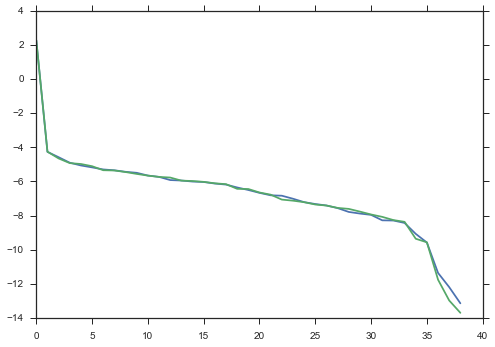

In [571]:
plt.plot(np.log(Sigma0))
plt.plot(np.log(Sigma1))

In [ ]:
chroma_cq = librosa.feature.chroma_cqt(y=y_m, sr=sr)

In [283]:
librosa.display.specshow(chroma_cq, x_axis='time')
plt.colorbar()
plt.title('stft')
plt.tight_layout()

NameError: name 'chroma_cq' is not defined

In [282]:
y_m.shape

(10914782,)

In [288]:
res2 = res1.swapaxes(1,2).reshape(-1, res1.shape[1], order = 'F')

In [294]:
res2[50:75, 0] == res1[:, 0, 2]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [402]:
power_f.shape

(128, 28166)

In [411]:
len_f = y_f.shape[0] / sr

In [412]:
power_f.shape[1] / len_f

86.13440725067568

In [417]:
apsExploreExponents = np.asarray(range(9))

In [420]:
apN = apsExploreExponents.size

In [422]:
Clist_m = []
for i in range(apN):
    C_temp = logic.PHI(C_pre_m, 2 ** apsExploreExponents[i])
    Clist_m.append(C_temp)

In [453]:
Clist_f = []
for i in range(apN):
    C_temp = logic.PHI(C_pre_f, 2 ** apsExploreExponents[i])
    Clist_f.append(C_temp)

In [424]:
normlist_m = []
for i in range(apN):
    normlist_m.append(np.linalg.norm(Clist_m[i] ,'fro') ** 2)

In [454]:
normlist_f = []
for i in range(apN):
    normlist_f.append(np.linalg.norm(Clist_f[i] ,'fro') ** 2)

In [426]:
norms_m = np.asarray(normlist_m)

In [455]:
norms_f = np.asarray(normlist_f)

In [436]:
import scipy as sp
interp_m = sp.interpolate.interp1d(apsExploreExponents, norms_m, kind = 'cubic')

In [456]:
interp_f = sp.interpolate.interp1d(apsExploreExponents, norms_f, kind = 'cubic')

In [437]:
intPts = np.arange(apsExploreExponents[0], apsExploreExponents[-1] + 0.01, 0.01)

In [438]:
normsIntpl_m = interp_m(intPts)

In [457]:
normsIntpl_f = interp_f(intPts)

In [446]:
normsIntplGrad_m = (normsIntpl_m[1:] - normsIntpl_m[0:-1]) / 0.01

In [458]:
normsIntplGrad_f = (normsIntpl_f[1:] - normsIntpl_f[0:-1]) / 0.01

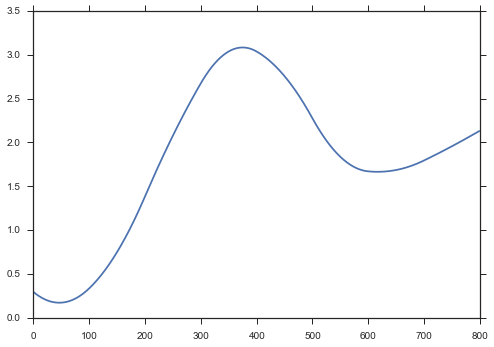

In [447]:
plt.plot(normsIntplGrad_m)

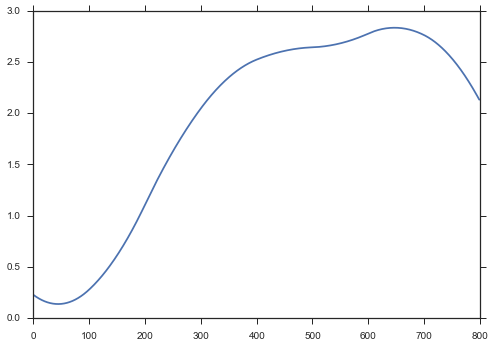

In [460]:
plt.plot(normsIntplGrad_f)

In [448]:
max(abs(normsIntplGrad_m))

3.0828313647933925

In [462]:
apsind_m = np.argmax(abs(normsIntplGrad_m), axis = 0)

In [464]:
aps_m = 2 ** intPts[apsind_m]

In [465]:
apsind_f = np.argmax(abs(normsIntplGrad_f), axis = 0)

In [466]:
aps_f = 2 ** intPts[apsind_f]

In [467]:
aps = aps_m + aps_f

In [493]:
apN

9

In [556]:
def recognition_train(datalist, apN = 9, out_mode = "simple"):
    R_list = []
    C_prem_list = []
    apsExploreExponents = np.asarray(range(apN))
    apt_list = []
    C_list = []
    intPts = np.arange(apsExploreExponents[0], apsExploreExponents[-1] + 0.01, 0.01)
    for data in datalist:
        R = (data.dot(data.T)) / data.shape[1]
        R_list.append(R)
        I = np.eye(R.shape[0])
        C_prem = R.dot(np.linalg.inv(R + I))
        C_prem_list.append(C_prem)
        Cnorm_list = []
        for i in range(apN):
            C_temp = logic.PHI(C_prem, 2 ** apsExploreExponents[i])
            Cnorm_list.append(np.linalg.norm(C_temp ,'fro') ** 2)
        norms = np.asarray(Cnorm_list)
        interpfun = sp.interpolate.interp1d(apsExploreExponents, norms, kind = 'cubic')
        norms_Intpl = interpfun(intPts)
        norms_Intpl_Grad = (norms_Intpl[1:] - norms_Intpl[0:-1]) / 0.01
        aptind = np.argmax(abs(norms_Intpl_Grad), axis = 0)
        apt = 2 ** intPts[aptind]
        apt_list.append(apt)
    apt = np.mean(apt_list)
    for C_prem in C_prem_list:
        C_list.append(logic.PHI(C_prem, apt))
    if out_mode == "complete":
        return C_list, R_list, C_prem_list, apt_list
    else:
        return C_list

In [510]:
C_list, R_list, C_prem_list, apt_list = recognition_train([states_m, states_f], out_mode = 'complete')

In [514]:
np.mean(apt_list)

51.050674301579299

In [512]:
aps_f

88.647005959099161

In [513]:
aps_m

13.454342644059432

In [518]:
M_m.shape

(39, 21318)

In [528]:
# Data normalization
mu_m = np.mean(M_m, axis = 1)
sigma_m = np.std(M_m, axis=1)
feature_m = (M_m - np.tile(mu_m[None].T, [1, M_m.shape[1]])) / sigma_m[None].T
feature_m  = (feature_m + 10)/20

In [537]:
# Data normalization
mu_f = np.mean(M_f, axis = 1)
sigma_f = np.std(M_f, axis=1)
feature_f = (M_f - np.tile(mu_f[None].T, [1, M_f.shape[1]])) / sigma_f[None].T
feature_f  = (feature_f + 10)/20

In [542]:
# Data normalization
mu_test = np.mean(M_test, axis = 1)
sigma_test = np.std(M_test, axis=1)
feature_test = (M_test - np.tile(mu_test[None].T, [1, M_test.shape[1]])) / sigma_test[None].T
feature_test  = (feature_test + 10)/20

In [557]:
C_list, R_list, C_prem_list, apt_list = recognition_train([feature_m, feature_f], out_mode = 'complete')

In [558]:
feature_f.shape

(39, 28166)

In [559]:
feature_m = RNN.augment(chroma_m)

(39, 39)

In [576]:
C_list = recognition_train([chroma_m, chroma_f])

In [579]:
results = recognition_predict(chroma_test, C_list)

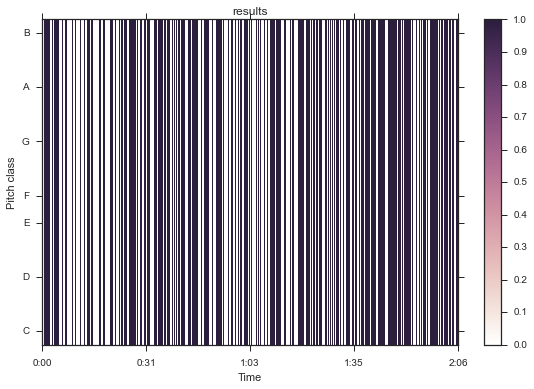

In [583]:
librosa.display.specshow(np.tile(results, [12, 1]), y_axis = 'chroma', x_axis='time')
plt.colorbar()
plt.title('results')
plt.tight_layout()

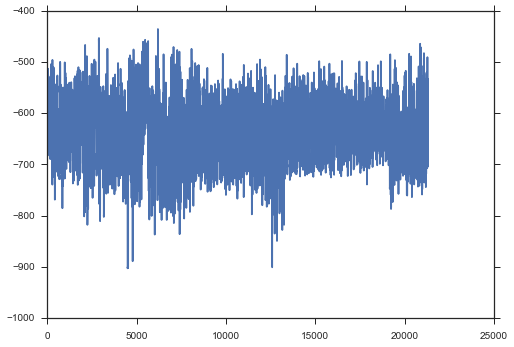

In [585]:
plt.plot(mfcc_m[0, :])